## Задача 9.7

Наша задача - решить нелинейно-возмущенную сингулярную краевую задачу:
$$\varepsilon y'' = (y')^2, y(0) = 1, y(1) = 0, \varepsilon \ll 1$$
Возьмем $\varepsilon = 10$ \
Найдем точное решение. Для этого решим систему:
$$\begin{equation}
\begin{cases}
   y' = p\\
   p' = \frac{1}{\varepsilon}p^2
 \end{cases}
 \end{equation}$$
 , где $y(0) = 1, y(1) = 0$ \
 Точным решением будет
 $$y(x) = 0.1(-ln(10x + \frac{10}{e^{10} + 1}) + ln(\frac{10}{e^{10} + 1}) + 10)$$

Напишем функцию, осуществляющую точное решение и построим ее график на (0, 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#функция точного решения
def exact_solution(x):
    return 0.1*(-np.log(10*x + (10/(np.exp(10)-1))) + np.log(10/(np.exp(10)-1)) + 10)

Рекомендуемое значение для N = 1000000. При меньших N сетка слишком мала и схема расходится. При больших N рекомендую также увеличить параметр acc, потому что при маленьких acc вычисление будет очень трудоемким. В целях визуализации я также продемонстрировал, как быстро находится решение, чем ближе к 0, тем лучше. 

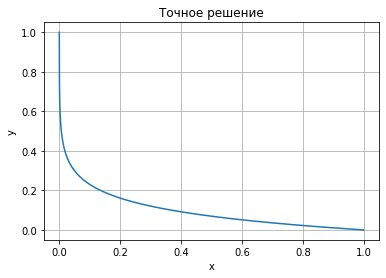

In [10]:
N = 10000000.0
acc = 0.001
eps = 0.1
t = np.linspace(0, 1, int(N)+1)
sol = exact_solution(t)
fig, ax = plt.subplots()

ax.plot(t, sol)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Точное решение')

plt.show()

Теперь решим уравнение численно воспользовавшись схемой:
$$\begin{equation}
\begin{cases}
   \frac{y^{n+1} - y^{n}}{h} = p^{n}\\
   \frac{p^{n+1} = p^{n}}{h} = \frac{1}{\varepsilon}{p^{n}}^2
 \end{cases}
 \end{equation}$$

In [8]:
#опишем функцию, которая выполнит нам собственно "стрельбу", возвращая для каждого из параметров alpha
#значение y(1)
def shooting(eps, alpha, N):
    #N = 1000000.0
    t = np.linspace(0, 1, int(N)+1)
    p = t.copy()
    p[0] = alpha
    for i in range(1, len(p)):
        p[i] = (1/(N*eps))*(p[i-1]**2) + p[i-1]
    y = t.copy()
    y[0] = 1
    for i in range(1, len(y)):
        y[i] = y[i-1] + (1/N)*p[i]
    return y[-1]

In [9]:
#бинарным поиском найдем параметр alpha
alpha_left = -10000
alpha_right = -1000
res = shooting(eps, alpha_left, N)
while(abs(res) > acc):
    print(abs(res))
    res = shooting(eps, (alpha_left + alpha_right)/2, N)
    if (res < 0):
        alpha_left = (alpha_left + alpha_right)/2
    else:
        alpha_right = (alpha_left + alpha_right)/2

0.6646203753417442
0.5756224372943475
0.4970490166369527


KeyboardInterrupt: 

In [ ]:
print("Прицельный параметр: ", (alpha_left + alpha_right)/2)

In [ ]:
#воспользуемся этим чтобы посчитать значение y в каждой точке
alpha = (alpha_left + alpha_right)/2
t = np.linspace(0, 1, int(N)+1)
p = t.copy()
p[0] = alpha
for i in range(1, len(p)):
    p[i] = (1/(N*eps))*(p[i-1]**2) + p[i-1]
y = t.copy()
y[0] = 1
for i in range(1, len(y)):
    y[i] = y[i-1] + (1/N)*p[i]

In [ ]:
#построим график
fig, ax = plt.subplots()

ax.plot(t, y)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Найдем среднеквадратичное отклонение 

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print("Среднеквадратичное отклонение: ", mse(sol, y))

Как видно, отклонение весьма небольшое, но при $\varepsilon \rightarrow 0$ вычисление становится все сложнее и 
параметр $\alpha$ становится все больше по модулю, что может привести к переполнению разряда, так что такие хорошие результаты получаются только для вот таких сравнительно больших $\varepsilon$.